In [1]:
#|default_exp app

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

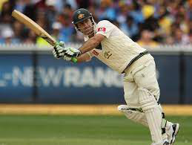

In [61]:
im = PILImage.create('leg_glance2.jpg')
im.thumbnail((192,192))
im

In [39]:
# def search_images(term, max_images=30):
#     url = 'https://duckduckgo.com/'
#     res = urlread(url,data={'q':term})
#     searchObj = re.search(r'vqd=([\d-]+)\&', res)
#     requestUrl = url + 'i.js'
#     params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
#     urls,data = set(),{'next':1}
#     while len(urls)<max_images and 'next' in data:
#         data = urljson(requestUrl,data=params)
#         urls.update(L(data['results']).itemgot('image'))
#         requestUrl = url + data['next']
#         time.sleep(0.2)
#     return L(urls)[:max_images]

In [40]:
# searches = 'sweep shot cricket', 'pull shot cricket'
# dl_path = Path('./images/cover_drive/')

In [41]:
# for o in searches:
#     dest = (dl_path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} photo'))
#     resize_images(dl_path/o, max_size=400, dest=dl_path/o)

In [43]:
#|export
learn = load_learner('model.pkl')

In [44]:
#|export
categories = ("off side", "on side")

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [62]:
classify_image(im)

{'off side': 0.0009938485454767942, 'on side': 0.9990062117576599}

In [16]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['bench_press.jpg', 'deadlift.jpg', 'lateral_raise.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7fe71b10a100>,
 'http://127.0.0.1:7860/',
 None)

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/home/zac-ubuntu-wsl/mambaforge/lib/python3.9/site-packages/starlette/responses.py", line 318, in __call__
    stat_result = await anyio.to_thread.run_sync(os.stat, self.path)
  File "/home/zac-ubuntu-wsl/mambaforge/lib/python3.9/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/zac-ubuntu-wsl/mambaforge/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/home/zac-ubuntu-wsl/mambaforge/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
FileNotFoundError: [Errno 2] No such file or directory: '/mnt/z/Documents1/Repositories/onside_offside_shot_detector/bench_press.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zac-u

In [8]:
#pip install nbdev
from nbdev.export import notebook2script

In [18]:
notebook2script('app.pynb')